In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("drains data.xlsx",sheet_name = "Sheet2")
cleared_df = df
df

,Sl.No.,Ward,Name of the Drain,From,To,Length\n(in Rmt),Width\n(in mts),Remarks
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,31.0,Gangulagedda,Judge Court,Dolphin Circle,1467.0,Varies from 2.5m to 5.5m,NaN
2,2.0,28.0,Ootagedda,NTR varadhi,Ramakrishna mission aashramam beach road,900.0,Varies from 4m to 8m,NaN
3,3.0,35.0,SL Canal,Rama Krishna Rythu Bazar,Sea Horse Junction,400.0,Varies from 2.4m to 9m,NaN
4,NaN,NaN,NaN,NaN,NaN,2767.0,NaN,NaN


## Changing column names

In [3]:
cleared_df = df.rename(columns={'Length\n(in Rmt)': 'Length (Rmt)','Width\n(in mts)': 'Width (mts)'}, inplace=True)

## Removing Sl.No. column from the data frame

In [4]:
cleared_df=df.drop("Sl.No.", axis=1, inplace=True)


## Deleting first and last row

In [5]:
cleared_df=df.iloc[1:-1].reset_index(drop = True)
#cleared_df = cleared_df.dropna(how = "all")

In [6]:
cleared_df

,Ward,Name of the Drain,From,To,Length (Rmt),Width (mts),Remarks
0,31.0,Gangulagedda,Judge Court,Dolphin Circle,1467.0,Varies from 2.5m to 5.5m,NaN
1,28.0,Ootagedda,NTR varadhi,Ramakrishna mission aashramam beach road,900.0,Varies from 4m to 8m,NaN
2,35.0,SL Canal,Rama Krishna Rythu Bazar,Sea Horse Junction,400.0,Varies from 2.4m to 9m,NaN


## Changing width to numbers

In [7]:
cleared_df['Width (mts)'] = cleared_df['Width (mts)'].str.replace('Varies from ', '', regex=False)


In [8]:
cleared_df

,Ward,Name of the Drain,From,To,Length (Rmt),Width (mts),Remarks
0,31.0,Gangulagedda,Judge Court,Dolphin Circle,1467.0,2.5m to 5.5m,NaN
1,28.0,Ootagedda,NTR varadhi,Ramakrishna mission aashramam beach road,900.0,4m to 8m,NaN
2,35.0,SL Canal,Rama Krishna Rythu Bazar,Sea Horse Junction,400.0,2.4m to 9m,NaN


## Taking data from the dataframe

In [9]:
cleared_df.columns


Index(['Ward', 'Name of the Drain ', 'From', 'To', 'Length (Rmt)',
       'Width (mts)', 'Remarks'],
      dtype='object')

In [10]:
wards = cleared_df['Ward']
drains = cleared_df['Name of the Drain ']
lengths = cleared_df['Length (Rmt)']
widths = cleared_df['Width (mts)']

## Creating new column for wards and drains


In [11]:
cleared_df["Ward and Drain"] = cleared_df["Ward"].astype(str) + " - " + cleared_df["Name of the Drain "]
ward_and_drains = cleared_df["Ward and Drain"]

## Plotting graph

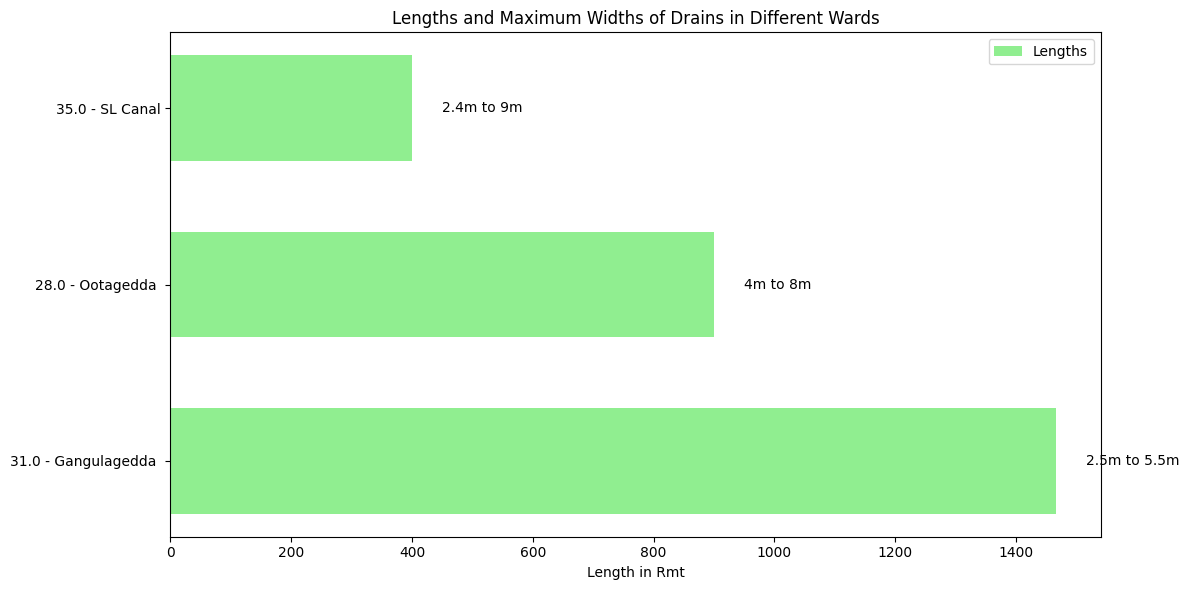

In [12]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Bar chart for lengths
bars = ax.barh(ward_and_drains, lengths,height =0.6, color='lightgreen', label='Lengths')

# Adding width range as text beside each bar
for bar, width_str in zip(bars, widths):
    width = width_str.split(' - ') # Extracting the maximum width from the string
    ax.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2, width_str, va='center', ha='left', color='black', fontsize=10)

# Adding labels and title
ax.set_xlabel('Length in Rmt')
ax.set_title('Lengths and Maximum Widths of Drains in Different Wards')
ax.set_yticks(range(len(ward_and_drains)))
ax.set_yticklabels(ward_and_drains)
ax.legend()
plt.tight_layout()

plt.show()